In [175]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading in analysis data and combining into one dataframe

In [121]:
df_analysis = pd.DataFrame()
model_lst = ['ada', 'allenai-unifiedqa-v2-t5-large-1363200', 'anirudh21-albert-large-v2-finetuned-mnli', 'microsoft-deberta-large-mnli', 'roberta-large-mnli', 't5-large', 'textattack-xlnet-base-cased-MNLI']
for model in model_lst:
    temp = pd.read_csv('analysis/analysis-' + model + '.tsv', sep='\t')
    if model == 'allenai-unifiedqa-v2-t5-large-1363200':
        temp['model'] = 'unifiedQA-t5'
    elif model == 'anirudh21-albert-large-v2-finetuned-mnli':
        temp['model'] = 'albert'
    elif model == 'microsoft-deberta-large-mnli':
        temp['model'] = 'deberta'
    elif model == 'roberta-large-mnli':
        temp['model'] = 'roberta'
    elif model == 't5-large':
        temp['model'] = 't5'
    elif model == 'textattack-xlnet-base-cased-MNLI':
        temp['model'] = 'xlnet'
    else:
        temp['model'] = 'ada'
    df_analysis = pd.concat([df_analysis, temp], ignore_index=True)
df_analysis.head(10)


,reasoning_type,fn_name,test_id,num_tests,num_correct,test_acc,model
0,motion,motion_one_hop,0,24,16,0.666667,ada
1,motion,motion_one_hop,1,36,31,0.861111,ada
2,motion,motion_one_hop,2,36,6,0.166667,ada
3,motion,motion_one_hop_jerund,0,72,50,0.694444,ada
4,motion,motion_one_hop_jerund,1,72,60,0.833333,ada
...,...,...,...,...,...,...,...
639,metaphor,motion_metaphors_skipping,1,16,0,0.000000,xlnet
640,metaphor,orientation_metaphors_behind,0,12,12,1.000000,xlnet
641,metaphor,orientation_metaphors_down,0,4,4,1.000000,xlnet
642,metaphor,orientation_metaphors_down,1,4,4,1.000000,xlnet


# Dataframe of Model vs Min accuracy by different model.

In [212]:
analysis_min = df_analysis.groupby(['model','reasoning_type']).min().reset_index()
analysis_min.head(10)

,model,reasoning_type,fn_name,test_id,num_tests,num_correct,test_acc
0,ada,containment,filled_with,0,18,0,0.000000
1,ada,distance,far_negative,0,20,0,0.000000
2,ada,metaphor,containment_metaphors_action_into_movement,0,4,0,0.000000
3,ada,motion,motion_one_hop,0,24,4,0.111111
4,ada,orientation,cardinals_neutral,0,24,0,0.000000
5,albert,containment,filled_with,0,18,0,0.000000
6,albert,distance,far_negative,0,20,0,0.000000
7,albert,metaphor,containment_metaphors_action_into_movement,0,4,0,0.000000
8,albert,motion,motion_one_hop,0,24,0,0.000000
9,albert,orientation,cardinals_neutral,0,24,0,0.000000


# Swarm plot of Model vs Min accuracy by different model.

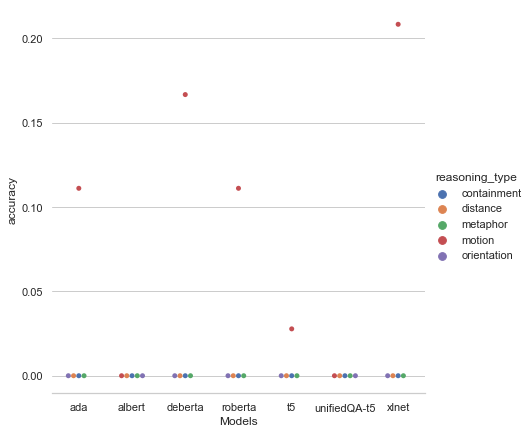

In [191]:
analysis_min_plt = sns.catplot(data=analysis_min, x='model', y='test_acc', hue='reasoning_type', 
                               kind='swarm', height=6, legend_out=True, aspect=1);
analysis_min_plt.despine(left=True)
analysis_min_plt.set_axis_labels("Models", "accuracy")
analysis_min_plt.legend.set_title("reasoning_type")


# Dataframe of Model vs Max accuracy by different model.

In [142]:
analysis_max = df_analysis.groupby(['model','reasoning_type']).max().reset_index()
analysis_max.head(10)

,model,reasoning_type,fn_name,test_id,num_tests,num_correct,test_acc
0,ada,containment,two_hop_is_in,6,1782,712,1.000000
1,ada,distance,transitivity_negative,3,480,314,1.000000
2,ada,metaphor,orientation_metaphors_looking_forward,2,240,192,1.000000
3,ada,motion,non_motion_one_hop_jerund,2,72,60,0.861111
4,ada,orientation,left_right_above_below_one_hop,1,1480,1103,0.750000
5,albert,containment,two_hop_is_in,6,1782,792,1.000000
6,albert,distance,transitivity_negative,3,480,120,1.000000
7,albert,metaphor,orientation_metaphors_looking_forward,2,240,36,1.000000
8,albert,motion,non_motion_one_hop_jerund,2,72,61,1.000000
9,albert,orientation,left_right_above_below_one_hop,1,1480,275,0.666667


# Swarm plot of Model vs Max accuracy by different model.

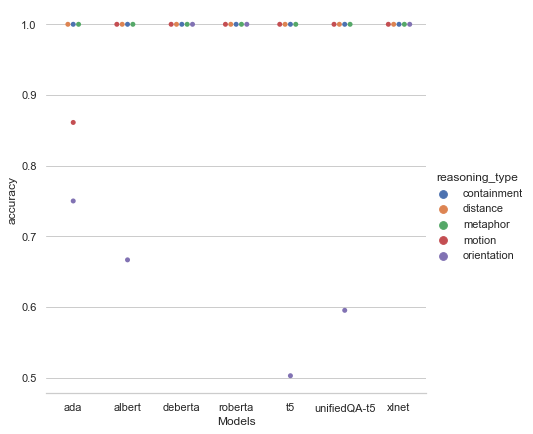

In [190]:
analysis_max_plt = sns.catplot(data=analysis_max, x='model', y='test_acc', hue='reasoning_type', 
                               kind='swarm', height=6, legend_out=True, aspect = 1);
analysis_max_plt.despine(left=True)
analysis_max_plt.set_axis_labels("Models", "accuracy")
analysis_max_plt.legend.set_title("reasoning_type")


# Dataframe of Model vs Mean accuracy by different model.

In [229]:
analysis_mean = df_analysis.groupby(['model','reasoning_type']).mean().reset_index()
analysis_mean.tail(10)

,model,reasoning_type,test_id,num_tests,num_correct,test_acc
25,unifiedQA-t5,containment,2.00000,519.642857,283.500000,0.533036
26,unifiedQA-t5,distance,1.10000,113.000000,57.800000,0.603021
27,unifiedQA-t5,metaphor,0.37037,34.296296,2.740741,0.128549
28,unifiedQA-t5,motion,1.00000,46.000000,27.916667,0.617477
29,unifiedQA-t5,orientation,0.40000,438.400000,186.800000,0.254225
30,xlnet,containment,2.00000,519.642857,285.785714,0.534241
31,xlnet,distance,1.10000,113.000000,51.750000,0.610104
32,xlnet,metaphor,0.37037,34.296296,6.259259,0.335802
33,xlnet,motion,1.00000,46.000000,33.250000,0.734954
34,xlnet,orientation,0.40000,438.400000,210.000000,0.332162


# Bar plot of Model vs Mean accuracy by different model.

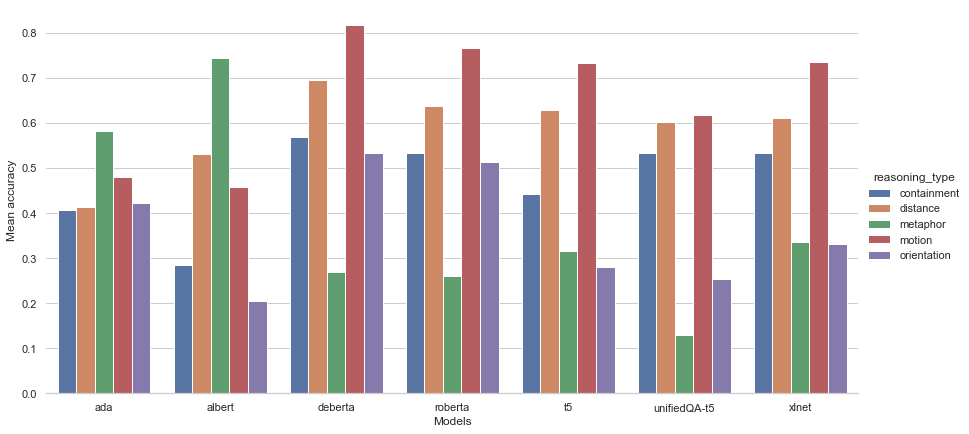

In [230]:
analysis_mean_plt = sns.catplot(data=analysis_mean, x='model', y='test_acc', hue='reasoning_type', 
                               kind='bar', height=6, legend=True, aspect=2, );

analysis_mean_plt.despine(left=True)
analysis_mean_plt.set_axis_labels("Models", "Mean accuracy")
analysis_mean_plt.legend.set_title("reasoning_type")


# Groupby dataframes

In [219]:
df_analysis.groupby(['reasoning_type', 'model']).mean()

test_id   num_tests  num_correct  test_acc
reasoning_type model                                                   
containment    ada           2.00000  519.642857   168.107143  0.407500
               albert        2.00000  519.642857   148.964286  0.284018
               deberta       2.00000  519.642857   255.428571  0.568157
               roberta       2.00000  519.642857   254.071429  0.533550
               t5            2.00000  519.642857   168.714286  0.442926
               unifiedQA-t5  2.00000  519.642857   283.500000  0.533036
               xlnet         2.00000  519.642857   285.785714  0.534241
distance       ada           1.10000  113.000000    49.100000  0.413958
               albert        1.10000  113.000000    50.550000  0.530417
               deberta       1.10000  113.000000    79.250000  0.695833
               roberta       1.10000  113.000000    65.750000  0.638542
               t5            1.10000  113.000000    71.350000  0.628021
               unifiedQA-t5  1.10000  113.000000    57.800000  0.603021
               xlnet         1.10000  113.000000    51.750000  0.610104
metaphor       ada           0.37037   34.296296    26.370370  0.581636
               albert        0.37037   34.296296    15.222222  0.744907
               deberta       0.37037   34.296296     4.222222  0.268570
               roberta       0.37037   34.296296     4.851852  0.259671
               t5            0.37037   34.296296     6.222222  0.315895
               unifiedQA-t5  0.37037   34.296296     2.740741  0.128549
               xlnet         0.37037   34.296296     6.259259  0.335802
motion         ada           1.00000   46.000000    22.833333  0.480903
               albert        1.00000   46.000000    22.083333  0.457176
               deberta       1.00000   46.000000    36.250000  0.817130
               roberta       1.00000   46.000000    34.000000  0.766782
               t5            1.00000   46.000000    32.583333  0.733796
               unifiedQA-t5  1.00000   46.000000    27.916667  0.617477
               xlnet         1.00000   46.000000    33.250000  0.734954
orientation    ada           0.40000  438.400000   287.000000  0.421875
               albert        0.40000  438.400000    67.800000  0.203829
               deberta       0.40000  438.400000   239.000000  0.533933
               roberta       0.40000  438.400000   205.600000  0.512363
               t5            0.40000  438.400000   186.000000  0.279686
               unifiedQA-t5  0.40000  438.400000   186.800000  0.254225
               xlnet         0.40000  438.400000   210.000000  0.332162

In [231]:
df_analysis.groupby(['model','reasoning_type']).mean()

test_id   num_tests  num_correct  test_acc
model        reasoning_type                                            
ada          containment     2.00000  519.642857   168.107143  0.407500
             distance        1.10000  113.000000    49.100000  0.413958
             metaphor        0.37037   34.296296    26.370370  0.581636
             motion          1.00000   46.000000    22.833333  0.480903
             orientation     0.40000  438.400000   287.000000  0.421875
albert       containment     2.00000  519.642857   148.964286  0.284018
             distance        1.10000  113.000000    50.550000  0.530417
             metaphor        0.37037   34.296296    15.222222  0.744907
             motion          1.00000   46.000000    22.083333  0.457176
             orientation     0.40000  438.400000    67.800000  0.203829
deberta      containment     2.00000  519.642857   255.428571  0.568157
             distance        1.10000  113.000000    79.250000  0.695833
             metaphor        0.37037   34.296296     4.222222  0.268570
             motion          1.00000   46.000000    36.250000  0.817130
             orientation     0.40000  438.400000   239.000000  0.533933
roberta      containment     2.00000  519.642857   254.071429  0.533550
             distance        1.10000  113.000000    65.750000  0.638542
             metaphor        0.37037   34.296296     4.851852  0.259671
             motion          1.00000   46.000000    34.000000  0.766782
             orientation     0.40000  438.400000   205.600000  0.512363
t5           containment     2.00000  519.642857   168.714286  0.442926
             distance        1.10000  113.000000    71.350000  0.628021
             metaphor        0.37037   34.296296     6.222222  0.315895
             motion          1.00000   46.000000    32.583333  0.733796
             orientation     0.40000  438.400000   186.000000  0.279686
unifiedQA-t5 containment     2.00000  519.642857   283.500000  0.533036
             distance        1.10000  113.000000    57.800000  0.603021
             metaphor        0.37037   34.296296     2.740741  0.128549
             motion          1.00000   46.000000    27.916667  0.617477
             orientation     0.40000  438.400000   186.800000  0.254225
xlnet        containment     2.00000  519.642857   285.785714  0.534241
             distance        1.10000  113.000000    51.750000  0.610104
             metaphor        0.37037   34.296296     6.259259  0.335802
             motion          1.00000   46.000000    33.250000  0.734954
             orientation     0.40000  438.400000   210.000000  0.332162

# Boxplot

<AxesSubplot:xlabel='reasoning_type', ylabel='test_acc'>

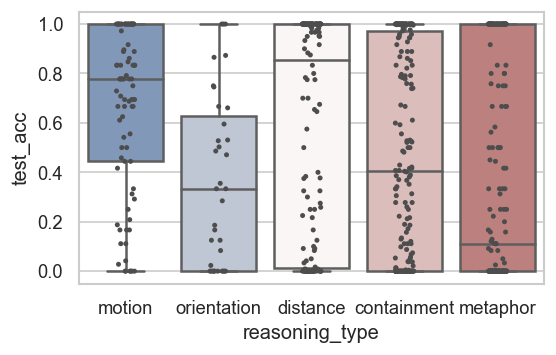

In [221]:
plt.figure(figsize=(5,3), dpi=120)
sns.boxplot(x='reasoning_type', y='test_acc', data=df_analysis,palette='vlag')
sns.stripplot(x='reasoning_type', y='test_acc', data=df_analysis,size=3, color='.3')

<AxesSubplot:xlabel='model', ylabel='test_acc'>

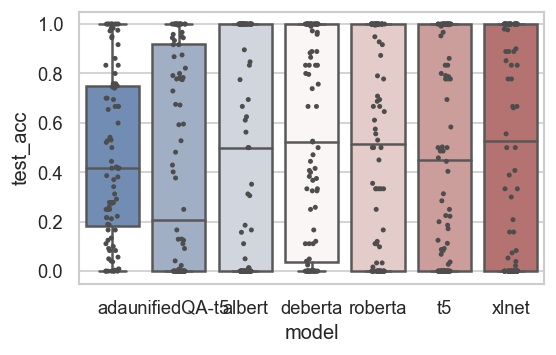

In [222]:
plt.figure(figsize=(5,3), dpi=120)
sns.boxplot(x='model', y='test_acc', data=df_analysis,palette='vlag')
sns.stripplot(x='model', y='test_acc', data=df_analysis,size=3, color='.3')

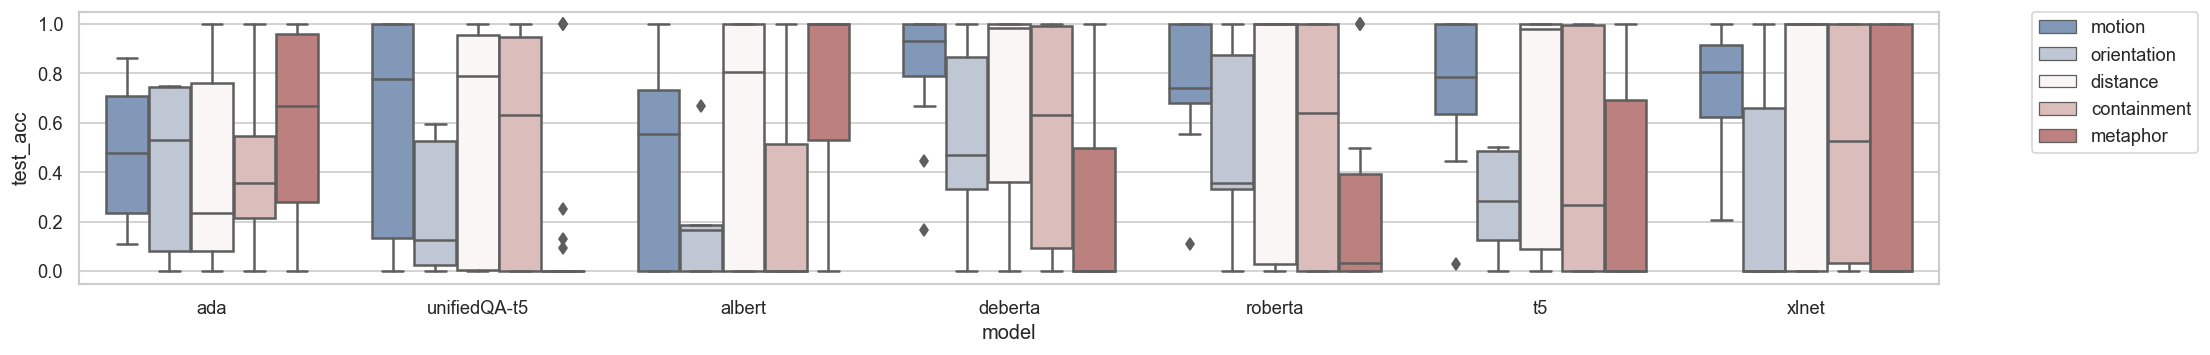

In [223]:
plt.figure(figsize=(20,3), dpi=120)
sns.boxplot(x='model', y='test_acc', data=df_analysis,palette='vlag', hue='reasoning_type')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

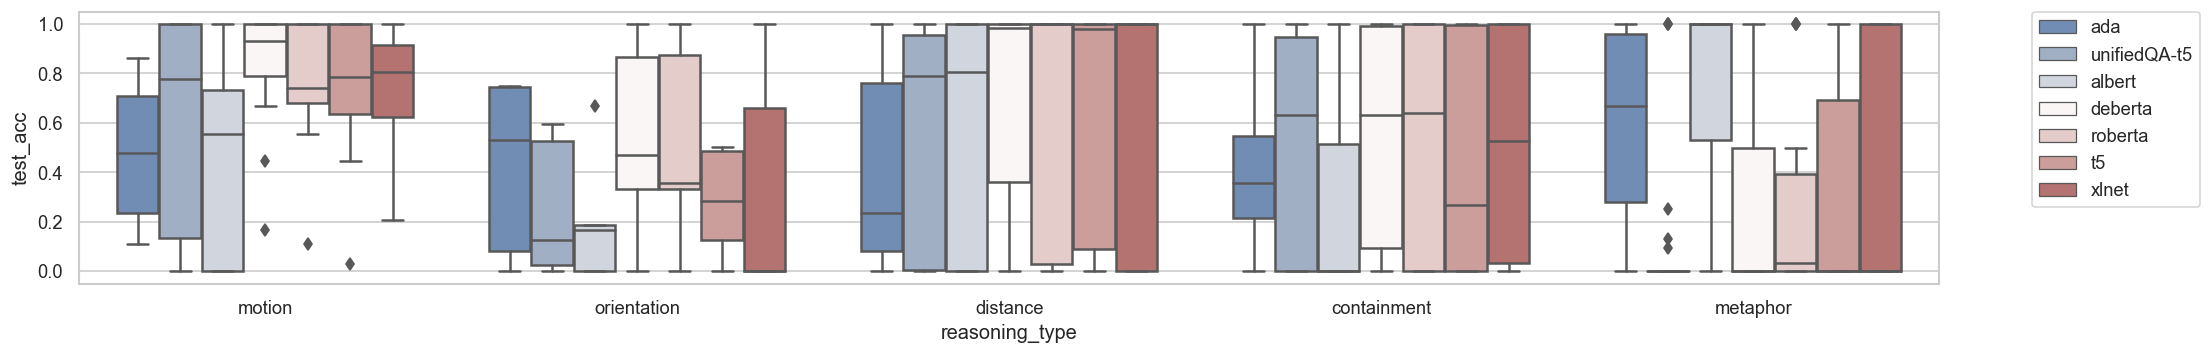

In [224]:
plt.figure(figsize=(20,3), dpi=120)
sns.boxplot(x='reasoning_type', y='test_acc', data=df_analysis,palette='vlag', hue='model')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

# Loading in summary data and combining into one dataframe

In [57]:
df_summary = pd.DataFrame()
model_lst = ['ada', 'allenai-unifiedqa-v2-t5-large-1363200', 'anirudh21-albert-large-v2-finetuned-mnli', 'microsoft-deberta-large-mnli', 'roberta-large-mnli', 't5-large', 'textattack-xlnet-base-cased-MNLI']
for model in model_lst:
    temp = pd.read_csv('summary/summary-' + model + '.tsv', sep='\t')
    if model == 'allenai-unifiedqa-v2-t5-large-1363200':
        temp['model'] = 'unifiedQA-t5'
    elif model == 'anirudh21-albert-large-v2-finetuned-mnli':
        temp['model'] = 'albert'
    elif model == 'microsoft-deberta-large-mnli':
        temp['model'] = 'deberta'
    elif model == 'roberta-large-mnli':
        temp['model'] = 'roberta'
    elif model == 't5-large':
        temp['model'] = 't5'
    elif model == 'textattack-xlnet-base-cased-MNLI':
        temp['model'] = 'xlnet'
    else:
        temp['model'] = 'ada'
    df_summary = pd.concat([df_summary, temp], ignore_index=True)
df_summary.head(10)

,reasoning_type,num_tests,acc_wo_partial_credit,acc_w_partial_credit,stdev_acc_w_partial_credit,model
0,motion,12,0.000000,0.480903,0.264545,ada
1,orientation,5,0.000000,0.421875,0.321465,ada
2,distance,20,0.050000,0.413958,0.388521,ada
3,containment,28,0.035714,0.407500,0.288346,ada
4,metaphor,27,0.259259,0.581636,0.360497,ada
5,motion,12,0.333333,0.617477,0.411908,unifiedQA-t5
6,orientation,5,0.000000,0.254225,0.255304,unifiedQA-t5
7,distance,20,0.200000,0.603021,0.417935,unifiedQA-t5
8,containment,28,0.178571,0.533036,0.414719,unifiedQA-t5
9,metaphor,27,0.111111,0.128549,0.312778,unifiedQA-t5


# Plot of Model vs Accuracy without partial credit ( Plot 1)

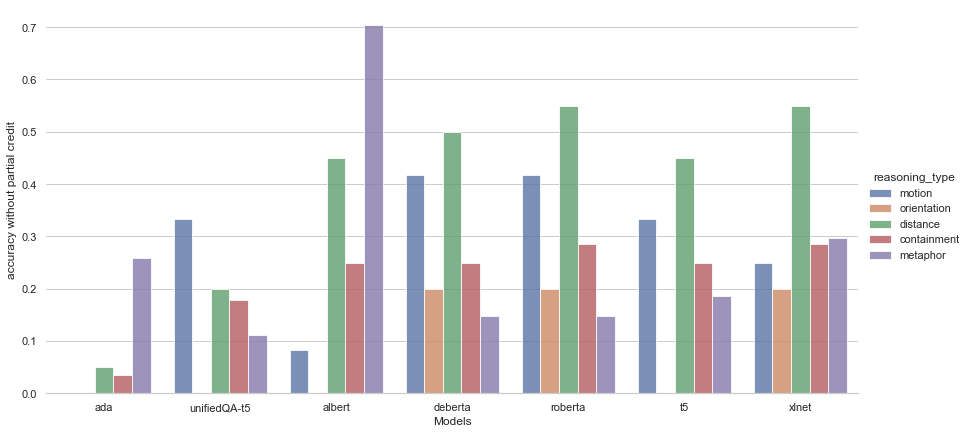

In [60]:
sns.set_theme(style="whitegrid")

plt1 = sns.catplot(data=df_summary, kind="bar", 
                   x="model", y="acc_wo_partial_credit", 
                   hue="reasoning_type", ci=None, alpha=.8, 
                   height=6, legend_out=True, aspect = 2
                  )
plt1.despine(left=True)
plt1.set_axis_labels("Models", "accuracy without partial credit")
plt1.legend.set_title("reasoning_type")

# Plot of Model vs Accuracy with partial credit ( Plot 2)

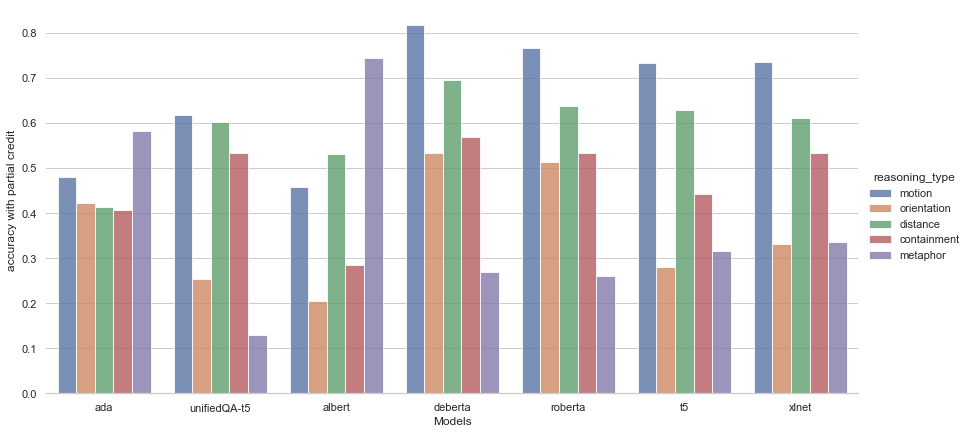

In [66]:
sns.set_theme(style="whitegrid")

plt2 = sns.catplot(data=df_summary, kind="bar", 
                   x="model", y="acc_w_partial_credit", 
                   hue="reasoning_type",ci=None, alpha=.8, 
                   height=6, legend_out=True, aspect = 2
                  )
plt2.despine(left=True)
plt2.set_axis_labels("Models", "accuracy with partial credit")
plt2.legend.set_title("reasoning_type")